# 0. Install and Import dependencies

In [1]:
!pip install ipykernel

In [4]:
!python -m ipykernel install --user --name py37

Installed kernelspec py37 in C:\Users\danus\AppData\Roaming\jupyter\kernels\py37


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [25]:
!pip install tensorflow==2.16.1 stable-baselines3 gym-anytrading gym

In [46]:
!pip install streamlit

In [47]:
# Gym stuff
import streamlit as st
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [27]:
df = pd.read_csv('data/Reliance.csv')

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume
0,18-11-2015,463.799988,465.649994,454.975006,456.000000,5142766.0
1,19-11-2015,459.450012,469.350006,458.625000,467.375000,5569752.0
2,20-11-2015,467.000000,476.399994,462.774994,473.424988,5167930.0
3,23-11-2015,475.000000,478.950012,473.100006,476.875000,4800026.0
4,24-11-2015,476.500000,485.799988,475.524994,483.850006,6768886.0


In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

C:\Users\danus\AppData\Local\Temp\ipykernel_13116\748457276.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [30]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,6768886.0


In [31]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [32]:
env.signal_features

C:\Users\danus\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 4.5600000e+02,  0.0000000e+00],
       [ 4.6737500e+02,  1.1375000e+01],
       [ 4.7342499e+02,  6.0499878e+00],
       [ 4.7687500e+02,  3.4500120e+00],
       [ 4.8385001e+02,  6.9750061e+00],
       [ 4.9432501e+02,  1.0475006e+01],
       [ 4.8952499e+02, -4.8000178e+00],
       [ 4.8354999e+02, -5.9750061e+00],
       [ 4.8295001e+02, -5.9997600e-01],
       [ 4.8897501e+02,  6.0249939e+00],
       [ 4.8860001e+02, -3.7500000e-01],
       [ 4.8272501e+02, -5.8750000e+00],
       [ 4.7602499e+02, -6.7000122e+00],
       [ 4.7045001e+02, -5.5749822e+00],
       [ 4.5795001e+02, -1.2500000e+01],
       [ 4.7517499e+02,  1.7224976e+01],
       [ 4.7647501e+02,  1.3000180e+00],
       [ 4.7754999e+02,  1.0749820e+00],
       [ 4.8795001e+02,  1.0400024e+01],
       [ 4.8932501e+02,  1.3750000e+00],
       [ 5.0485001e+02,  1.5524994e+01],
       [ 4.9595001e+02, -8.8999939e+00],
       [ 4.9604999e+02,  9.9976003e-02],
       [ 4.9364999e+02, -2.3999939e+00],
       [ 5.01899

# 2. Build Environment

In [33]:
env.action_space

Discrete(2)

info {'total_reward': 131.8499755859375, 'total_profit': 0.9786144784493046, 'position': <Positions.Short: 0>}


C:\Users\danus\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


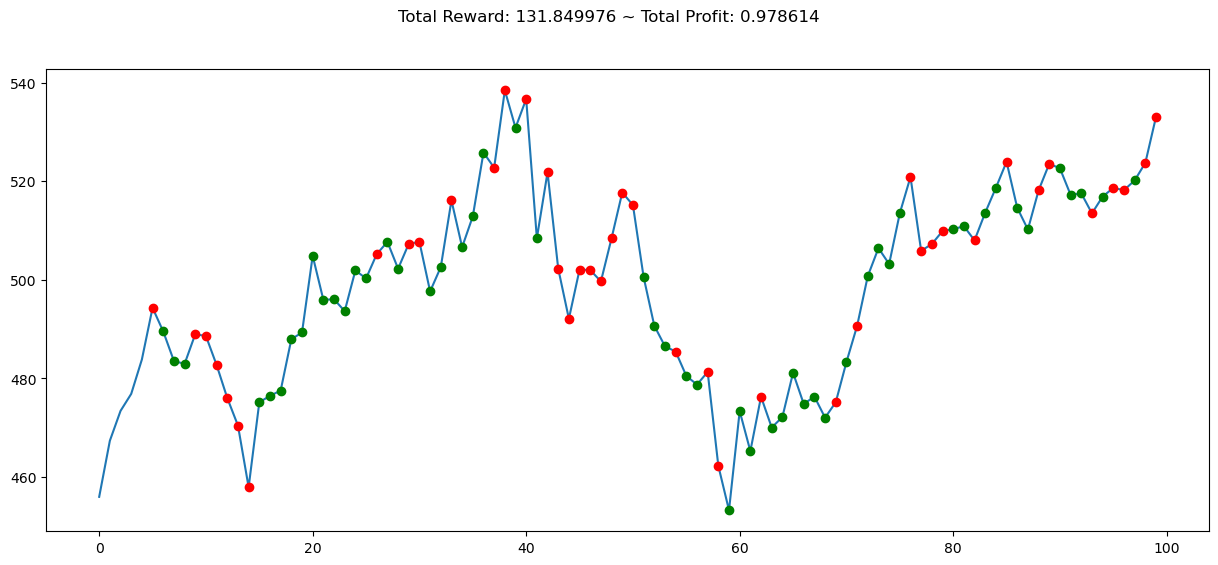

In [34]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [11]:
# state = env.reset()
# while True:
#     action = env.action_space.sample()
#     result = env.step(action) # Modify to store the result in a single variable
#     # Print the result to inspect it
#     print("Result from env.step:", result)
#     if len(result) == 4:
#         n_state, reward, done, info = result  # Unpack only if there are 4 values
#         if done:
#             print("info", info)
#             break
#     else:
#         print("Unexpected number of values returned from env.step")
#         break

# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()

# 3. Build Environment and Train

In [35]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [36]:
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1192     |
|    time_elapsed     | 0        |
|    total_timesteps  | 376      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.09     |
|    n_updates        | 68       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1066     |
|    time_elapsed     | 0        |
|    total_timesteps  | 752      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 162      |
----------------------------------
----------------------------------
| rollout/            |          |
|  

# 4. Evaluation

In [45]:
env = gym.make('stocks-v0', df=df, frame_bound=(70,100), window_size=5)
obs, info= env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

info {'total_reward': 33.274993896484375, 'total_profit': 1.0732272774950051, 'position': <Positions.Long: 1>}


In [ ]:
# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
# obs = env.reset()
# print(obs.shape)
# # while True:
# #     obs = obs[np.newaxis, :]
# #     action, _states = model.predict(obs)
# #     obs, rewards, done, info = env.step(action)
# #     if done:
# #         print("info", info)
# #         break

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
# obs = env.reset()
# # Convert obs to a NumPy array if it's a tuple
# if isinstance(obs, tuple):
#     obs = np.array(obs)

# while True:
#     obs = obs[np.newaxis, :]
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = env.step(action)
#     if done:
#         print("info", info)
#         break

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

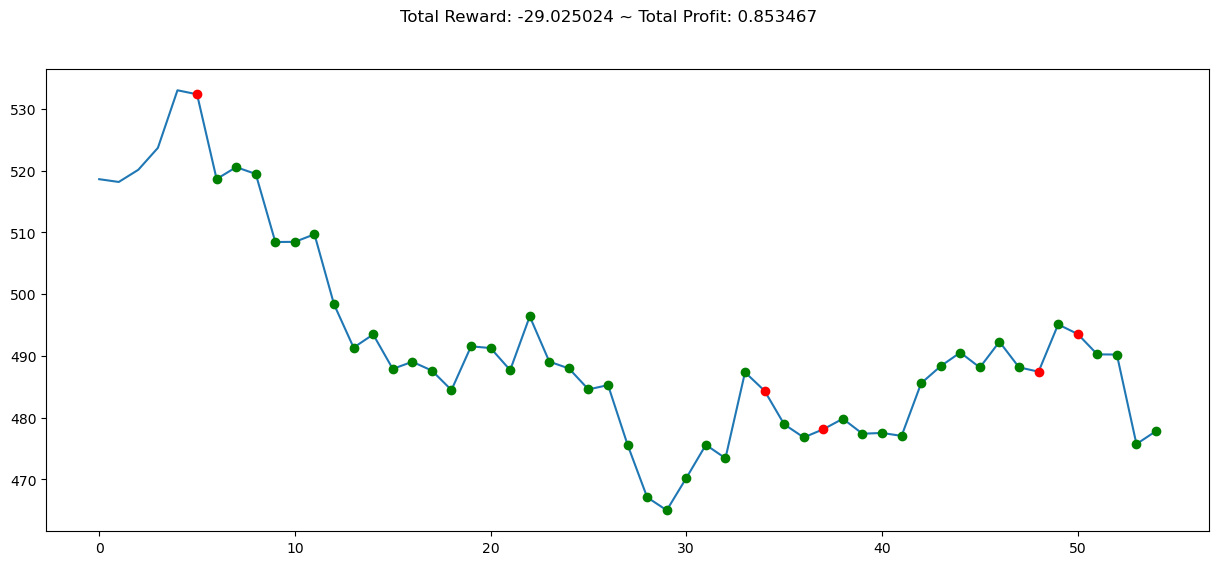

In [39]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()